In [11]:
from grenmlin import simulator, grn
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import visualize, get_input_signals, test_inputs

## N:1 MUX

Generalized MUX structure. Boolean formula:
$$
Y = (X_1 \cdot \overline S_1 \cdot \overline S_2 \cdot \dots \cdot \overline S_{\log_2 N}) + (X_2 \cdot S_1 \cdot \overline S_2 \cdot \dots \cdot \overline S_{\log_2 N}) + \dots + (X_N \cdot S_1 \cdot S_2 \cdot \dots \cdot S_{\log_2 N}) 
$$

In [12]:
def make_mux(N):
    # Check if N is power of 2
    if (N < 2) or not (N and (N & (N - 1)) == 0):
        raise ValueError("N must be a power of 2 and larger than 1 (e.g., 2, 4, 8, 16...)")

    num_select_lines = int(np.log2(N))

    # Initialize GRN
    my_grn = grn.grn()

    # Add input species for data lines X1, X2, ..., XN
    for i in range(1, N + 1):
        my_grn.add_input_species(f"X{i}")

    # Add input species for select lines S1, S2, ..., Slog2(N)
    for i in range(1, num_select_lines + 1):
        my_grn.add_input_species(f"S{i}")

    # Add output species for MUX
    my_grn.add_species("MUX", 0.1)

    # MUX logic
    for i in range(1, N + 1):
        # Determine binary representation
        binary_select = f"{i - 1:0{num_select_lines}b}"[::-1]

        # Define regulators for the current gene
        regulators = [{"name": f"X{i}", "type": 1, "Kd": 5, "n": 2}]
        for j, bit in enumerate(binary_select):
            regulators.append({
                "name": f"S{j + 1}",
                "type": 1 if bit == "1" else -1,
                "Kd": 5,
                "n": 3
            })

        # Define products for the current gene
        products = [{"name": "MUX"}]

        # Add the gene to the GRN
        my_grn.add_gene(10, regulators, products)

    # Plot the network
    my_grn.plot_network()

    # Generate input signals
    inputs = get_input_signals(N + num_select_lines, 100)
    
    # Simulate the GRN
    T, Y = simulator.simulate_sequence(my_grn, inputs, t_single=250, plot_on=False)

    # Visualize the results
    visualize(T, Y, my_grn)

    return my_grn


# Testing

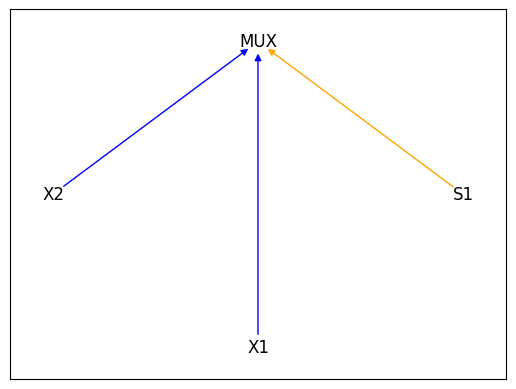

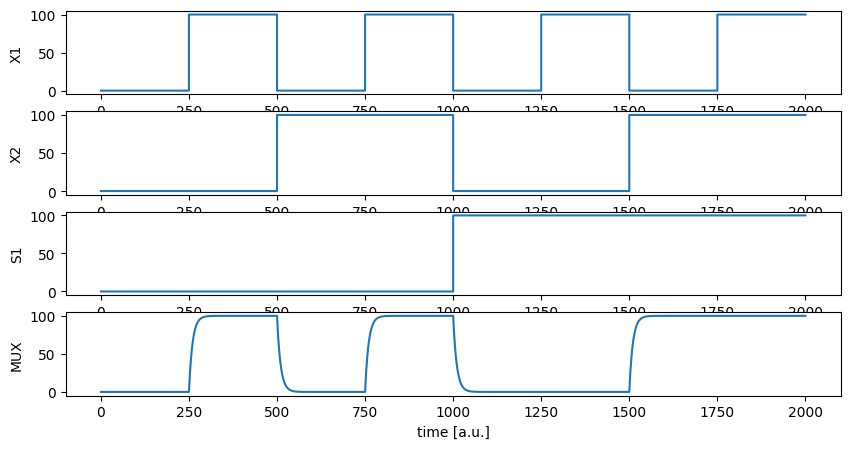

In [13]:
make_mux(2)

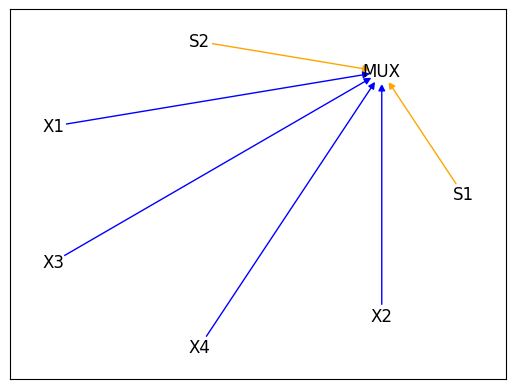

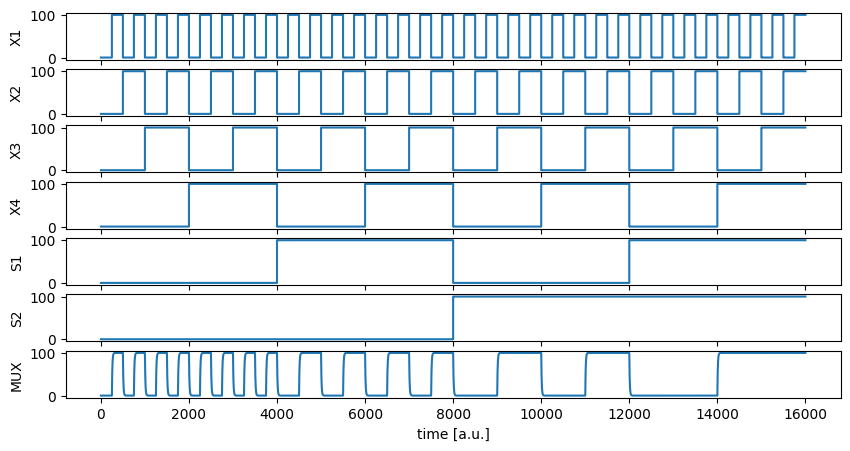

In [14]:
make_mux(4)

# Timing

In [15]:
import time
import sys
import os
import matplotlib.pyplot as plt
from contextlib import contextmanager

@contextmanager
def suppress_matplotlib():
    """Suppress matplotlib output."""
    backend = plt.get_backend()
    plt.switch_backend('Agg')  # Use a non-displaying backend
    try:
        yield
    finally:
        plt.switch_backend(backend)  # Restore the original backend

def suppress_output(func, *args, **kwargs):
    """Run a function while suppressing its output."""
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        old_stderr = sys.stderr
        try:
            sys.stdout = devnull
            sys.stderr = devnull
            return func(*args, **kwargs)
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr

def time_make_mux():
    """Times the make_mux function for different N values."""
    N_values = [2, 4, 8]
    for N in N_values:
        start_time = time.time()
        with suppress_matplotlib():
            suppress_output(make_mux, N)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"N={N}, Time Taken: {elapsed_time:.4f} seconds")

# Call the timing function
time_make_mux()

C:\Users\krist\AppData\Local\Temp\ipykernel_1864\936731986.py:15: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  plt.switch_backend(backend)  # Restore the original backend


N=2, Time Taken: 0.1223 seconds
N=4, Time Taken: 0.3121 seconds
N=8, Time Taken: 34.3972 seconds
